In [1]:
! python --version

Python 3.9.10


In [2]:
! pip list

Package                       Version
----------------------------- -----------
alembic                       1.7.7
altair                        4.2.0
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
async-generator               1.10
attrs                         21.4.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.10.0
bleach                        4.1.0
blinker                       1.4
bokeh                         2.4.2
Bottleneck                    1.3.4
brotlipy                      0.7.0
cached-property               1.5.2
certifi                       2021.10.8
certipy                       0.1.3
cffi                          1.15.0
charset-normalizer            2.0.12
click                         8.1.2
cloudpickle                   2.0.0
colorama                      0.4.4
conda        

In [3]:
import sqlalchemy 
import os
import pandas as pd

In [4]:
# for connecting database used sqlachemy postgres engine

# Accessed the userid and password from environmental variable
DATABASE = os.getenv('POSTGRESQL_DATABASE')
USER = os.getenv('POSTGRESQL_USERNAME')
PASSWORD = os.getenv('POSTGRESQL_PASSWORD')


connection_string = f'postgresql://{USER}:{PASSWORD}@db:5432/postgres'

engine = sqlalchemy.create_engine(connection_string)

connection = engine.connect()

In [8]:
# Create table named passengers
# create Table
# pd.read_sql("""CREATE TABLE passengers (  
#     id SERIAL NOT NULL PRIMARY KEY, 
#     survived INT,
#     pclass INT,
#     name VARCHAR(255),
#     sex TEXT,
#     age FLOAT8,
#     siblings_spouses INT,
#     parents_children INT,
#     fare FLOAT8
# );""",connection)

In [7]:
# checking the created table
pd.read_sql_query("SELECT * FROM passengers",connection)

,id,survived,pclass,name,sex,age,siblings_spouses,parents_children,fare


In [9]:
# Got the dataset from this stanford edu
# http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
# Loaded the csv file in dataframe
df = pd.read_csv("titanic.csv")

In [13]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [14]:
df.shape

(887, 8)

In [16]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [23]:
# rename the dataframes columns same as table column inorder to insert it
df.rename(columns={
        "Survived":"survived",
        "Pclass":"pclass",
        "Name":"name",
        "Sex":"sex",
        "Age":"age",
        "Siblings/Spouses Aboard":"siblings_spouses",
        "Parents/Children Aboard":"parents_children",
        "Fare":"fare"
         },inplace=True)

In [25]:
# after changing the column name
df.head()

,survived,pclass,name,sex,age,siblings_spouses,parents_children,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [26]:
# Insert the records to the table
df.to_sql("passengers",engine,if_exists="append",index=False)

887

In [28]:
sql_data = pd.read_sql_query("SELECT * FROM passengers",connection)

In [29]:
sql_data

,id,survived,pclass,name,sex,age,siblings_spouses,parents_children,fare
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
882,883,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,884,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,885,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,886,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [31]:
# check for null data
sql_data.isnull().sum()

id                  0
survived            0
pclass              0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
fare                0
dtype: int64

In [33]:
# data description
sql_data.describe()

,id,survived,pclass,age,siblings_spouses,parents_children,fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,444.000000,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,256.199141,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,222.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,665.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,887.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [40]:
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

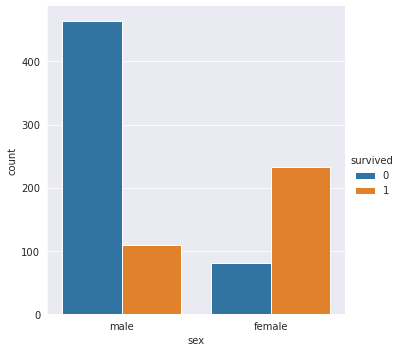

In [42]:
# used seaborns catplot and displayed the relationship between survived and sex
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = sql_data)

<AxesSubplot:xlabel='sex', ylabel='age'>

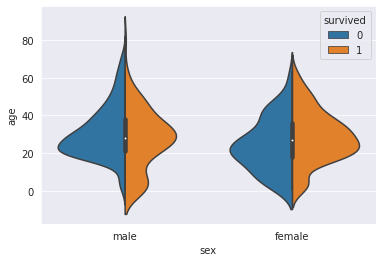

In [45]:
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = sql_data, split = True)

In [46]:
# close the db connection
connection.close()